# 1. Описание датасета "Used Cars Dataset"
Мы проводим исследование фиктивного датасета для разведочного анализа данных (EDA) и тестирования простых моделей прогнозирования. Датасет содержит 52 строк и 27 колонок.

Ссылка на датасет [Used Cars Dataset]: https://www.kaggle.com/datasets/shivanink8/used-cars-dataset

## 1.1. Цели:

1) Определение данных;
2) Формулирование гипотез;
3) Загрузка данных в Python;
4) Проверка данных;
5) Очистка данных;
6) Преобразование данных;
7) Выбор данных для анализа;
8) Агрегирование данных;
9) Визуализация данных;
10) Подтверждение или опровержение поставленных гипотез;
11) Формулирование ограничений и выводов.

## 1.2. Определение данных для анализа:

В качестве данных для анализа был выбран датасет «Used Cars Dataset». В датасете представлены набор данных примерно 52 подержанных автомобилей из autotrader.com и carfax.com

Для анализа будем чаще всего использовать следующие данные из датасета: ...

## 1.3. Описание данных

##### Содержимое в датасете
- `id`- индекс
- `brand` -  марка
- `model` - модель
- `year` - год выпуска 
- `miles` - пробег 
- `city mileage` - пробег по городу
- `highway mileage` - пробег по шоссе 
- `horsepower` - мощность
- `torque` - крутящий момент
- `engine capacity litre` - мощность двигателя
- `fuel capacity` - запас топлива
- `num cylinder` - количество цилиндров 
- `num set` - количество посадочных мест 
- `num owners` - количество владельцев
- `price` - цена
- `link` - ссылка
- `condition` - состояние
- `type` - тип
- `doors` - количество дверей
- `wheel drive` - привод на колесах
- `engine type` - тип двигателя
- `speed levels` - уровни оборота
- `front headroom` - запас хода спереди
- `front legroom` - передний запас для переднего привода
- `rear headroom` - запас хода сзади
- `rear legroom` - задний запас для заднего привода
- `service records` - сервисные записи

## 1.4. Выбор признаков для машинного обучения

Для машинного обучения выберем целевой признак - стоимость автомобиля. Сопоставим с остальными признаками, а именно, характеристики и конфигурации автомобиля выявяляем примерную стоимость автомобиля.- цена автомобиля


# 2. Предобработка и подготовка к машинному обучению

In [1]:
!pip install jupyternotify -q

In [2]:
# Уведомление о завершение работы определенного ячейка
import jupyternotify
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [3]:
# Подключаем все необходимые библиотеки
import os
import re
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import (
    # Критерий Стьюдента
    ttest_ind, 
    f_oneway,
    # Тест Манна-Уитни, для гипотез H0 и H1
    mannwhitneyu,
    f_oneway,
    pearsonr
)

# Масштабируемость модели
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder

# Время обучения модели
import timeit
from lightgbm import LGBMRegressor
# Вызов библиотеки для отключения предупреждения
import warnings

# Разбиение на обучающую, валидационную и тестовую выборку и кроссвалидацию для повышения качеств обучения
from sklearn.model_selection import train_test_split, GridSearchCV
# Конвейер
from sklearn.pipeline import make_pipeline

# и для машинного обучения разными способами (по условию мы выбираем линейную регрессию):
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_text, export_graphviz
from catboost import CatBoostRegressor
# Метод ближайшего соседа KNN
from sklearn.neighbors import KNeighborsRegressor
# Метод опорного вектора, SVR - для регрессии
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv('used_cars.csv')

## 2.1. Изучение данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     52 non-null     int64  
 1   brand                  52 non-null     object 
 2   model                  52 non-null     object 
 3   year                   52 non-null     int64  
 4   miles                  52 non-null     int64  
 5   city_mileage           52 non-null     int64  
 6   highway_mileage        52 non-null     int64  
 7   horsepower             52 non-null     int64  
 8   torque                 52 non-null     int64  
 9   engine_capacity_litre  52 non-null     float64
 10  fuel_capacity          52 non-null     float64
 11  num_cylinder           52 non-null     int64  
 12  num_seat               52 non-null     int64  
 13  num_owners             52 non-null     int64  
 14  price                  52 non-null     int64  
 15  link    

In [6]:
df.columns

Index(['id', 'brand', 'model', 'year', 'miles', 'city_mileage',
       'highway_mileage', 'horsepower', 'torque', 'engine_capacity_litre',
       'fuel_capacity', 'num_cylinder', 'num_seat', 'num_owners', 'price',
       'link', 'condition', 'type', 'doors', 'wheel_drive', 'engine_type',
       'speed_levels', 'front_headroom', 'front_legroom', 'rear_headroom',
       'rear_legroom', 'service_records'],
      dtype='object')

In [7]:
display(df.head())
display(df.tail())

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,6,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,7,Ford,Focus,2014,97027,27,37,159,146,2.0,...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,8,Honda,Civic,2016,95396,31,42,158,138,1.5,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,9,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5


,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
47,53,Hyundai,Sonata,2019,33412,23,32,245,260,2.0,...,sedan,4,2,gas,8.0,40.4,45.5,38.0,35.6,10
48,54,Hyundai,Elantra SE,2020,13830,30,40,147,132,2.0,...,sedan,4,2,gas,6.0,40.3,42.2,37.3,35.7,6
49,55,Ford,Fusion,2019,23507,20,29,245,275,2.0,...,sedan,4,2,gas,6.0,39.2,44.3,37.8,38.3,11
50,56,Hyundai,Elantra SE,2020,11296,30,40,147,132,2.0,...,sedan,4,2,gas,6.0,40.3,42.2,37.3,35.7,7
51,57,Honda,Accord,2018,82729,30,38,192,192,1.5,...,sedan,4,2,gas,6.0,39.5,42.3,37.3,40.4,9


In [8]:
#Приведение к нижнему регистру и удаление лишних пробелов в названиях столбцов
df.columns = df.columns.str.strip().str.lower()

## 2.2. Преобразование данных

In [9]:
# Проверим объем занимаемой памяти в Мбайтах до преобразования
print(f'Объем датасета до преобразования: {df.memory_usage(deep=True).sum() / 1024 / 1024:.3f} Мбайт')  

Объем датасета до преобразования: 0.048 Мбайт


In [10]:
original_memory = df.memory_usage(deep=True).sum()

In [11]:
# Автоматизируем
def change_type_variable(dateframe, show_print_report=False):
    for name_column in dateframe:
        if(dateframe[name_column].dtype  == 'int64'):
            dateframe[name_column] = dateframe[name_column].astype('int32')
            if(show_print_report):
                print(f'Успешно, преобразовали в другой тип INT32 колонки: {name_column}')
        if(dateframe[name_column].dtype  == 'float64'):
            dateframe[name_column] = dateframe[name_column].astype('float32')
            if(show_print_report):
                print(f'Успешно, преобразовали в другой тип FLOAT32 колонки: {name_column}')
        if(name_column in ['accidents_or_damage', 'one_owner', 'personal_use_only']):
            dateframe[name_column] = dateframe[name_column].astype(bool)
    if not(show_print_report):
        print('Успешно, преобразованы в другой тип')

In [12]:
# Преобразуем их
change_type_variable(df)

Успешно, преобразованы в другой тип


In [13]:
# Проверим объем занимаемой памяти в Мбайтах до преобразования
print(f'Объем датасета после преобразования: {df.memory_usage(deep=True).sum() / 1024 / 1024:.3f} Мбайт')

Объем датасета после преобразования: 0.044 Мбайт


In [14]:
optimized_memory = df.memory_usage(deep=True).sum()

In [15]:
# Узнаем, сколько сэкономили памяти
savings_percentage = (original_memory - optimized_memory) / original_memory * 100
print(f"Сэкономлено {savings_percentage:.2f}% памяти")

Сэкономлено 9.11% памяти


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     52 non-null     int32  
 1   brand                  52 non-null     object 
 2   model                  52 non-null     object 
 3   year                   52 non-null     int32  
 4   miles                  52 non-null     int32  
 5   city_mileage           52 non-null     int32  
 6   highway_mileage        52 non-null     int32  
 7   horsepower             52 non-null     int32  
 8   torque                 52 non-null     int32  
 9   engine_capacity_litre  52 non-null     float32
 10  fuel_capacity          52 non-null     float32
 11  num_cylinder           52 non-null     int32  
 12  num_seat               52 non-null     int32  
 13  num_owners             52 non-null     int32  
 14  price                  52 non-null     int32  
 15  link    

## 2.3. Описательная статистика

In [17]:
df.describe()

,id,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,...,price,condition,doors,wheel_drive,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,1.0,52.0,52.000000,51.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,31.365385,2018.673077,33901.250000,29.038462,37.423077,176.865385,177.923077,1.832692,14.232693,4.038462,...,21763.423077,4.0,4.0,2.153846,6.313725,38.680771,42.467308,37.238468,37.632694,7.326923
std,15.378912,1.396370,22700.646139,5.947356,4.136619,33.793507,47.256433,0.379743,2.603973,0.277350,...,3532.455322,NaN,0.0,0.538138,0.761320,0.919087,1.045199,0.444202,1.604249,4.714272
min,3.000000,2014.000000,5000.000000,17.000000,24.000000,143.000000,99.000000,1.400000,7.000000,4.000000,...,13590.000000,4.0,4.0,2.000000,6.000000,37.500000,41.099998,35.799999,33.200001,1.000000
25%,18.750000,2018.000000,16454.750000,26.500000,35.750000,152.000000,138.000000,1.500000,12.400000,4.000000,...,19519.000000,4.0,4.0,2.000000,6.000000,37.724999,42.200001,37.074999,37.175001,4.000000
50%,31.500000,2019.000000,27448.500000,30.000000,38.000000,159.500000,181.000000,2.000000,13.600000,4.000000,...,21998.500000,4.0,4.0,2.000000,6.000000,38.500000,42.299999,37.200001,37.400002,6.000000
75%,44.250000,2019.250000,42442.000000,30.000000,40.000000,192.000000,192.000000,2.000000,15.050000,4.000000,...,22996.000000,4.0,4.0,2.000000,6.000000,39.299999,42.400002,37.500000,38.299999,10.000000
max,57.000000,2022.000000,97027.000000,55.000000,49.000000,288.000000,294.000000,3.500000,19.000000,6.000000,...,33777.000000,4.0,4.0,4.000000,9.000000,40.400002,45.500000,38.000000,40.400002,26.000000


## 2.4.Предобработка данных

### 2.4.1. Пропущенные значения

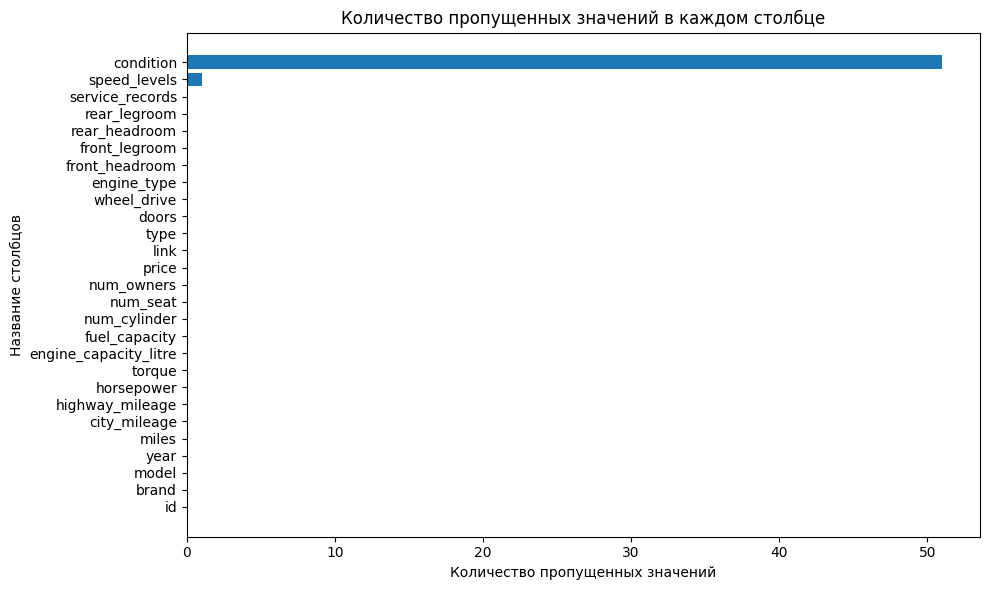

In [18]:
# Создаем список с именами столбцов и количеством пропущенных значений
missing_counts = [df[column].isnull().sum() for column in df.columns]

# Сортируем столбцы в порядке убывания количества пропущенных значений
sorted_columns, sorted_missing_counts = zip(*sorted(zip(df.columns, missing_counts), key=lambda x: x[1], reverse=False))

# Создаем горизонтальную столбчатую диаграмму
plt.figure(figsize=(10, 6))
# Используем barh для горизонтальных столбцов
plt.barh(sorted_columns, sorted_missing_counts)  
plt.xlabel('Количество пропущенных значений')
plt.ylabel('Название столбцов')
plt.title('Количество пропущенных значений в каждом столбце')
plt.tight_layout()

# Отображаем график
plt.show()

In [19]:
columns_isnull = [col for col, count in zip(sorted_columns, sorted_missing_counts) if count > 0]
print(f'Названий столбцов, у которых пропуски:')
for col in columns_isnull:
    print('\t' + col)

Названий столбцов, у которых пропуски:
	speed_levels
	condition


In [20]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

id - 0
brand - 0
model - 0
year - 0
miles - 0
city_mileage - 0
highway_mileage - 0
horsepower - 0
torque - 0
engine_capacity_litre - 0
fuel_capacity - 0
num_cylinder - 0
num_seat - 0
num_owners - 0
price - 0
link - 0
condition - 51
type - 0
doors - 0
wheel_drive - 0
engine_type - 0
speed_levels - 1
front_headroom - 0
front_legroom - 0
rear_headroom - 0
rear_legroom - 0
service_records - 0


In [21]:
# Замена пропусков медианой для 'speed_levels'
median_speed = df['speed_levels'].median()
df['speed_levels'].fillna(median_speed, inplace=True)

# Замена пропусков медианой для 'condition'
median_condition = df['condition'].median()
df['condition'].fillna(median_condition, inplace=True)

In [22]:
# Проверим еще раз
for col in columns_isnull:
    print(f'Колонка: {col}; \t Кол-во пропусков: {df[col].isnull().sum()}')

Колонка: speed_levels; 	 Кол-во пропусков: 0
Колонка: condition; 	 Кол-во пропусков: 0


### 2.4.2. Дубликаты

In [23]:
# Количество дублирующих значений
df.duplicated().sum()

0

In [24]:
df.describe()

,id,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,...,price,condition,doors,wheel_drive,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.0,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,31.365385,2018.673077,33901.250000,29.038462,37.423077,176.865385,177.923077,1.832692,14.232693,4.038462,...,21763.423077,4.0,4.0,2.153846,6.307693,38.680771,42.467308,37.238468,37.632694,7.326923
std,15.378912,1.396370,22700.646139,5.947356,4.136619,33.793507,47.256433,0.379743,2.603973,0.277350,...,3532.455322,0.0,0.0,0.538138,0.755073,0.919087,1.045199,0.444202,1.604249,4.714272
min,3.000000,2014.000000,5000.000000,17.000000,24.000000,143.000000,99.000000,1.400000,7.000000,4.000000,...,13590.000000,4.0,4.0,2.000000,6.000000,37.500000,41.099998,35.799999,33.200001,1.000000
25%,18.750000,2018.000000,16454.750000,26.500000,35.750000,152.000000,138.000000,1.500000,12.400000,4.000000,...,19519.000000,4.0,4.0,2.000000,6.000000,37.724999,42.200001,37.074999,37.175001,4.000000
50%,31.500000,2019.000000,27448.500000,30.000000,38.000000,159.500000,181.000000,2.000000,13.600000,4.000000,...,21998.500000,4.0,4.0,2.000000,6.000000,38.500000,42.299999,37.200001,37.400002,6.000000
75%,44.250000,2019.250000,42442.000000,30.000000,40.000000,192.000000,192.000000,2.000000,15.050000,4.000000,...,22996.000000,4.0,4.0,2.000000,6.000000,39.299999,42.400002,37.500000,38.299999,10.000000
max,57.000000,2022.000000,97027.000000,55.000000,49.000000,288.000000,294.000000,3.500000,19.000000,6.000000,...,33777.000000,4.0,4.0,4.000000,9.000000,40.400002,45.500000,38.000000,40.400002,26.000000


## 2.5. Отсев до определенного кол-во уникальных значений

Для кодирования признаков OHE или OH будет черевато, если оставить много уникальных названия, потому что это приведет к созданию много новых признаков. Отсеиваем до небольших количеств, то есть сделаем так, чтобы создали максимум небольших новых закодированных признаков..

In [25]:
# Сделаем копию датасета
df_copy = df.copy()

In [26]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     52 non-null     int32  
 1   brand                  52 non-null     object 
 2   model                  52 non-null     object 
 3   year                   52 non-null     int32  
 4   miles                  52 non-null     int32  
 5   city_mileage           52 non-null     int32  
 6   highway_mileage        52 non-null     int32  
 7   horsepower             52 non-null     int32  
 8   torque                 52 non-null     int32  
 9   engine_capacity_litre  52 non-null     float32
 10  fuel_capacity          52 non-null     float32
 11  num_cylinder           52 non-null     int32  
 12  num_seat               52 non-null     int32  
 13  num_owners             52 non-null     int32  
 14  price                  52 non-null     int32  
 15  link    

In [27]:
# Функция, которая разделяет численные и категориальные признаки
def divide_features(df):
    numerical_features = df.select_dtypes(include=['number']).columns
    categorical_features = df.select_dtypes(exclude=['number']).columns
    
    return numerical_features, categorical_features

In [28]:
numerical_features, categorical_features = divide_features(df)

In [29]:
print("Численные признаки:", numerical_features.to_list())

Численные признаки: ['id', 'year', 'miles', 'city_mileage', 'highway_mileage', 'horsepower', 'torque', 'engine_capacity_litre', 'fuel_capacity', 'num_cylinder', 'num_seat', 'num_owners', 'price', 'condition', 'doors', 'wheel_drive', 'speed_levels', 'front_headroom', 'front_legroom', 'rear_headroom', 'rear_legroom', 'service_records']


In [30]:
print("Нечисленные признаки:", categorical_features.to_list())

Нечисленные признаки: ['brand', 'model', 'link', 'type', 'engine_type']


In [31]:
# Можно закодировать, ибо не так уж много разных уникальных признаков
df_copy['brand'].value_counts()

brand
Honda         23
Volkswagen    11
Hyundai        7
Ford           5
Chevrolet      3
Subaru         3
Name: count, dtype: int64

In [32]:
# Можно закодировать, ибо не так уж много разных уникальных признаков
df_copy['model'].value_counts()

model
Civic         14
Jetta          7
Accord         7
Elantra SE     4
Passat         4
Fusion         3
Sonata         3
Impreza        2
Malibu         2
Volt LT        1
Focus          1
Legacy         1
Clarity        1
Insight        1
Taurus         1
Name: count, dtype: int64

In [33]:
# Можно закодировать, ибо не так уж много разных уникальных признаков
df_copy['type'].value_counts()

type
sedan    52
Name: count, dtype: int64

In [34]:
# Можно закодировать, ибо не так уж много разных уникальных признаков
df_copy['engine_type'].value_counts()

engine_type
gas                    49
hybrid_gas_electric     3
Name: count, dtype: int64

# 3. Машинное обучение

In [35]:
# Здесь сохраняем результаты машинного обучения
results = pd.DataFrame()

# Счетчтик для нумерация моеделй
count_model = 0

## 3.1. Деление на обучающей и тестовой выборки

In [36]:
# Получаем признак и цель 
features = df.drop(['price', 'link'], axis=1)
target = df['price']

In [37]:
# Разделим на обучающую и тестовую выборку
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)

## 3.2. Кодирование признаков - прямое кодирование (One-Hot Encoding)

Закодируем признаки: `brand`, `model`, `type`, `engine type`

_**Памятка себе:**_

**Модели основанные на деревьях (все модели в проекте кроме Линейной) могут работать с порядковым кодированием категорий (OrdinalEncoding).**

**OHE сильно раздувает размерность данных, что сказывается на вычислительной нагрузке (времени).**

In [38]:
# Выбираем категориальные признаки
# 'brand', 'model', 'type', 'engine_type'
categorical_features = ['brand', 'model', 'type', 'engine_type']

In [39]:
# Кодируем
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
display(encoder_ohe)

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [40]:
# Обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train[categorical_features])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [41]:
# Добавляем закодированные признаки в X_train_ohe
# Encoder_ohe.get_feature_names_out() позволяет получить названия колонок
features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[categorical_features])

In [42]:
# Энкодером, который обучен на тренировочной выборке, кодируем тестовую
features_test[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_test[categorical_features])

C:\Users\nikis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [43]:
# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(categorical_features, axis=1)
features_test = features_test.drop(categorical_features, axis=1)

In [44]:
display(features_train.head())
display(features_test.head())

,id,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,...,model_Focus,model_Fusion,model_Impreza,model_Insight,model_Jetta,model_Malibu,model_Passat,model_Taurus,model_Volt LT,engine_type_hybrid_gas_electric
8,14,2019,25044,30,40,147,184,1.4,13.2,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21,27,2020,35743,20,29,245,275,2.0,18.0,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,25,2019,24250,30,40,147,184,1.4,13.2,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7,2014,97027,27,37,159,146,2.0,12.4,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,26,2019,38097,17,24,288,254,3.5,19.0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,id,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,...,model_Focus,model_Fusion,model_Impreza,model_Insight,model_Jetta,model_Malibu,model_Passat,model_Taurus,model_Volt LT,engine_type_hybrid_gas_electric
26,32,2020,12395,30,38,192,192,1.5,14.8,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,45,2020,36506,21,31,245,275,2.0,16.5,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,44,2018,51279,30,38,192,192,1.5,14.8,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,31,2020,27457,23,34,174,206,2.0,18.5,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,12,2022,6811,27,35,182,176,2.5,18.5,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Устраняем случайные и возможные пропуски для избежания ошибок
features_train = features_train.dropna()
target_train = target_train[features_train.index]

features_test = features_test.dropna()
target_test = target_test[features_test.index]

## 3.3. Обучение модели

### 3.3.2. LinearRegression

In [46]:
# Устанавливаем нужные параметры
parameters = {}

# Инициализируем модель (включая масштабирование) и GridSearchCV
pipeline_scale = make_pipeline(StandardScaler(), LinearRegression())
model = GridSearchCV(pipeline_scale, param_grid=parameters, cv=5, scoring='neg_mean_absolute_error', error_score='raise')
display(model)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={}, scoring='neg_mean_absolute_error')

In [47]:
%%notify -m "KNeighborsRegressor OHE"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE TRAIN:', result_MAE_t)
print('TIME TRAIN [s]:', round(time, 2))

MAE TRAIN: 45714.271298546395
TIME TRAIN [s]: 0.0
CPU times: total: 31.2 ms
Wall time: 43.6 ms


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [48]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_test)

elapsed = round(timeit.default_timer() - start_time, 3)

# Узнаем MAE
result_MAE_v = mean_absolute_error(target_test, predictions)
print('MAE TEST:', result_MAE_v)
print('Предсказание:', predictions.mean())

MAE TEST: 2564.561753511988
Предсказание: 22000.04242454062
CPU times: total: 0 ns
Wall time: 3.97 ms


In [49]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': pipeline_scale.named_steps[pipeline_scale.steps[-1][0]].__class__.__name__, 
    'MAE TRAIN': result_MAE_t, 
    'MAE TEST': result_MAE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': model.refit_time_, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': model.best_params_
})

display(results[count_model])
count_model+=1

NAME                   LinearRegression
MAE TRAIN                  45714.271299
MAE TEST                    2564.561754
PREDICTIONS                22000.042425
TIME TRAINING [s]              0.003002
TIME PREDICTION [s]               0.002
PARAMETRS                            {}
Name: 0, dtype: object

### 3.3.3. DecisionTreeRegressor

In [50]:
# Матрица гиперпараметров
parameters = {
    'decisiontreeregressor__max_depth': range(1, 101, 10),
    'decisiontreeregressor__min_samples_leaf': [1, 0.5]
}

# Инициализируем модель (включая масштабирование) и GridSearchCV
pipeline_scale = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=12345))
model = GridSearchCV(pipeline_scale, param_grid=parameters, cv=5, scoring='neg_mean_absolute_error')

# Выводим модель с настроенными гиперпараметрами
display(model)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=12345))]),
             param_grid={'decisiontreeregressor__max_depth': range(1, 101, 10),
                         'decisiontreeregressor__min_samples_leaf': [1, 0.5]},
             scoring='neg_mean_absolute_error')

In [51]:
%%notify -m f"{pipeline_scale.named_steps[pipeline_scale.steps[-1][0]].__class__.__name__}"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE TRAIN:', result_MAE_t)
print('TIME TRAIN [s]:', round(time, 2))

MAE TRAIN: 2225.7539397639403
TIME TRAIN [s]: 0.0
CPU times: total: 531 ms
Wall time: 593 ms


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [52]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_test)

elapsed = round(timeit.default_timer() - start_time, 3)

# Узнаем MAE
result_MAE_v = mean_absolute_error(target_test, predictions)
print('MAE TEST:', result_MAE_v)
print('Предсказание:', predictions.mean())

MAE TEST: 3383.3048128342243
Предсказание: 22004.529411764703
CPU times: total: 0 ns
Wall time: 1.99 ms


In [53]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': pipeline_scale.named_steps[pipeline_scale.steps[-1][0]].__class__.__name__, 
    'MAE TRAIN': result_MAE_t, 
    'MAE TEST': result_MAE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': model.refit_time_, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': model.best_params_
})

results[count_model]
count_model+=1

### 3.3.4. Support Vector Machine

In [54]:
# Матрица гиперпараметров
parameters = {
    'svr__C': [0.1, 1, 10],  
    'svr__kernel': ['linear', 'rbf'],
    'svr__gamma': ['scale', 'auto']
}

# Инициализируем модель с параметрами и создаем конвейер
pipeline_scale = make_pipeline(StandardScaler(), SVR())
model = GridSearchCV(pipeline_scale, param_grid=parameters, cv=5, scoring='neg_mean_absolute_error')

# Выводим модель с настроенными гиперпараметрами
display(model)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1, 10],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_absolute_error')

In [55]:
%%notify -m f"{pipeline_scale.named_steps[pipeline_scale.steps[-1][0]].__class__.__name__}"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE TRAIN:', result_MAE_t)
print('TIME TRAIN [s]:', round(time, 2))

MAE TRAIN: 2207.7940271620964
TIME TRAIN [s]: 0.0
CPU times: total: 266 ms
Wall time: 326 ms


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [56]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_test)

elapsed = round(timeit.default_timer() - start_time, 3)

# Узнаем MAE
result_MAE_v = mean_absolute_error(target_test, predictions)
print('MAE TEST:', result_MAE_v)
print('Предсказание:', predictions.mean())

MAE TEST: 3541.9725369069174
Предсказание: 21602.169682337382
CPU times: total: 0 ns
Wall time: 2.04 ms


In [57]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': pipeline_scale.named_steps[pipeline_scale.steps[-1][0]].__class__.__name__, 
    'MAE TRAIN': result_MAE_t, 
    'MAE TEST': result_MAE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': model.refit_time_, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': model.best_params_
})

results[count_model]
count_model+=1

## 3.4. Итог

### 3.4.1. Анализ моделей

In [58]:
%%notify -m "Total result"
results = pd.DataFrame(results).T

<IPython.core.display.Javascript object>

In [59]:
results

,NAME,MAE TRAIN,MAE TEST,PREDICTIONS,TIME TRAINING [s],TIME PREDICTION [s],PARAMETRS
0,LinearRegression,45714.271299,2564.561754,22000.042425,0.003002,0.002,{}
1,DecisionTreeRegressor,2225.75394,3383.304813,22004.529412,0.003001,0.002,"{'decisiontreeregressor__max_depth': 1, 'decis..."
2,SVR,2207.794027,3541.972537,21602.169682,0.003001,0.002,"{'svr__C': 10, 'svr__gamma': 'scale', 'svr__ke..."


In [60]:
# Рассчитываем рейтинг с учетом указанных приоритетов
results['RATING'] = (
    0.5 * (1 - (results['MAE TEST'] / results['MAE TEST'].max())) +
    0.3 * (1 - (results['TIME TRAINING [s]'] / results['TIME TRAINING [s]'].max())) +
    0.2 * (1 - (results['TIME PREDICTION [s]'] / results['TIME PREDICTION [s]'].max()))
)
# Сортируем DataFrame по убыванию рейтинга
results = results.sort_values(by='RATING', ascending=False)

In [61]:
results

,NAME,MAE TRAIN,MAE TEST,PREDICTIONS,TIME TRAINING [s],TIME PREDICTION [s],PARAMETRS,RATING
0,LinearRegression,45714.271299,2564.561754,22000.042425,0.003002,0.002,{},0.137975
1,DecisionTreeRegressor,2225.75394,3383.304813,22004.529412,0.003001,0.002,"{'decisiontreeregressor__max_depth': 1, 'decis...",0.022494
2,SVR,2207.794027,3541.972537,21602.169682,0.003001,0.002,"{'svr__C': 10, 'svr__gamma': 'scale', 'svr__ke...",0.000071


### Важность признаков модели "DecisionTreeRegressor"

In [62]:
#results.T[0]

In [63]:
#results['PARAMETRS'][0]

In [64]:
# Извлекаем параметры из словаря
#param_dict = results['PARAMETRS'][0]

#cleaned_params = {key.split('__')[1]: value for key, value in param_dict.items() if key.startswith('decisiontreeregressor__')}

In [65]:
# Инициализация модели с лучшими гиперпараметрами
#best_model = DecisionTreeRegressor(**cleaned_params)

In [66]:
# Извлекаем результаты решающего дерева
dt_results = results[results['NAME'] == 'DecisionTreeRegressor'].iloc[0]
display(dt_results)

NAME                                               DecisionTreeRegressor
MAE TRAIN                                                     2225.75394
MAE TEST                                                     3383.304813
PREDICTIONS                                                 22004.529412
TIME TRAINING [s]                                               0.003001
TIME PREDICTION [s]                                                0.002
PARAMETRS              {'decisiontreeregressor__max_depth': 1, 'decis...
RATING                                                          0.022494
Name: 1, dtype: object

In [67]:
# Извлекаем параметры из словаря
param_dict = results['PARAMETRS']

# Преобразуем значения словаря в строки и извлекаем параметры
cleaned_params = {re.sub('decisiontreeregressor__', '', str(key)): value for key, value in param_dict.items()}
display(cleaned_params)

{'0': {},
 '1': {'decisiontreeregressor__max_depth': 1,
  'decisiontreeregressor__min_samples_leaf': 1},
 '2': {'svr__C': 10, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}}

In [68]:
# Инициализация модели с лучшими гиперпараметрами
cleaned_params.pop('1', None)
cleaned_params.pop('2', None)
best_model = DecisionTreeRegressor(**cleaned_params['0'])

In [69]:
# Обучение модели
best_model.fit(features_train, target_train)

DecisionTreeRegressor()

In [70]:
# Получение важности признаков
feature_importance = best_model.feature_importances_

In [71]:
# Получение названий признаков
feature_names = features_train.columns

In [72]:
# Сортировка индексов признаков по их важности
sorted_idx = np.argsort(feature_importance)

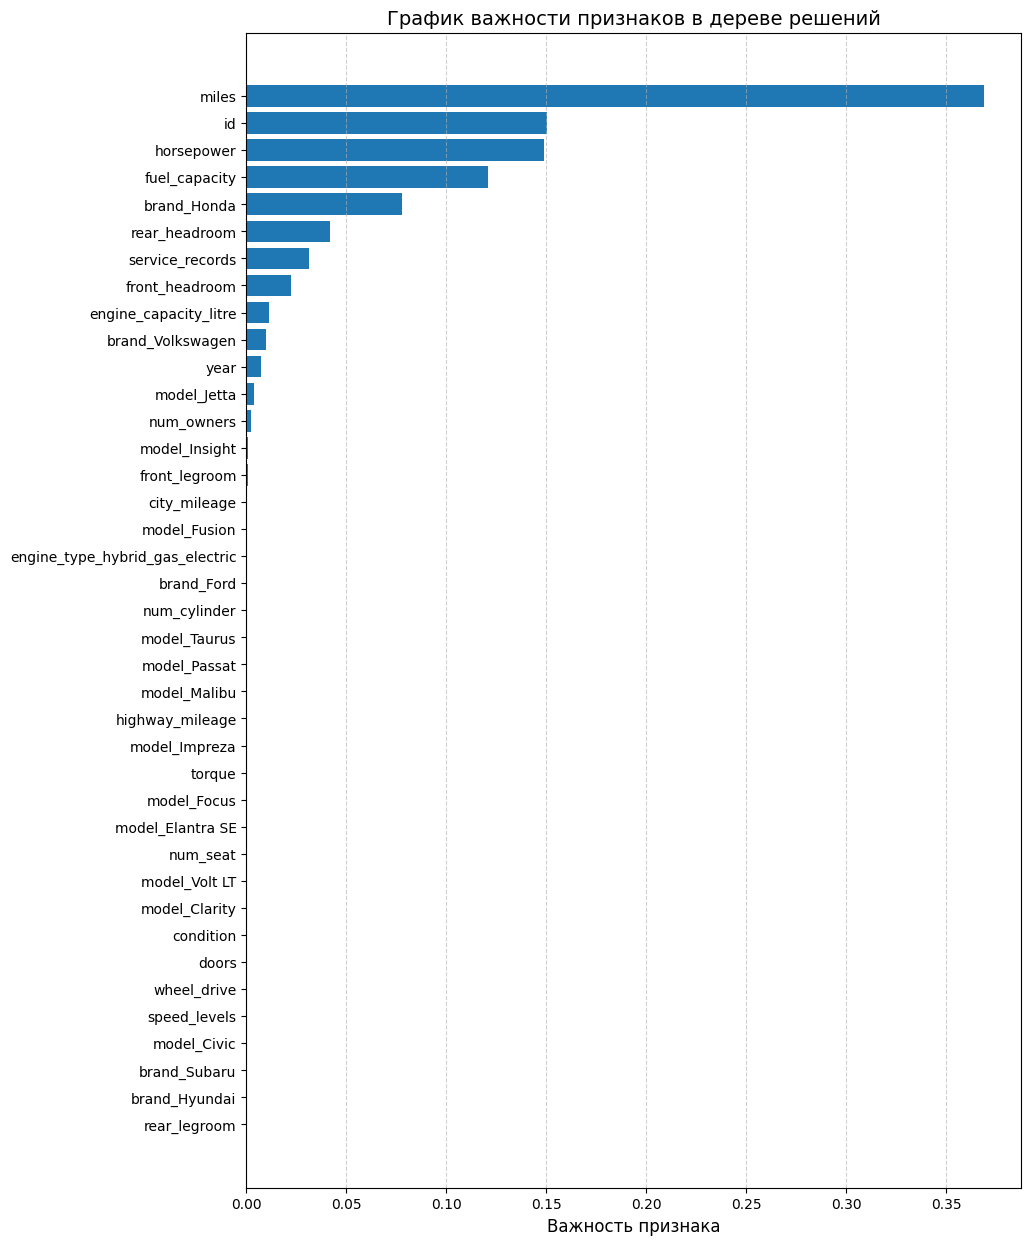

In [73]:
# Построение графика важности признаков с улучшенным отображением
plt.figure(figsize=(10, 15))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx], fontsize=10)
plt.xlabel('Важность признака', fontsize=12)
plt.title('График важности признаков в дереве решений', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### 3.4.3. Визуализация Дерево решений

In [74]:
# Визуализация дерева
dot_data_graphviz = export_graphviz(
    best_model, 
    out_file=None, 
    feature_names=list(features_train.columns), 
    filled=True, 
    rounded=True, 
    special_characters=True
)
graph = graphviz.Source(dot_data_graphviz)
graph.render("decision_tree")
graph.view("decision_tree")

'decision_tree.pdf'

In [75]:
# Вывод правил дерева в текстовом виде
tree_rules = export_text(best_model, feature_names=list(features_train.columns), max_depth=5)
print("Правила дерева решений:\n", tree_rules)

Правила дерева решений:
 |--- miles <= 60274.50
|   |--- horsepower <= 183.00
|   |   |--- fuel_capacity <= 12.80
|   |   |   |--- id <= 21.50
|   |   |   |   |--- miles <= 29721.50
|   |   |   |   |   |--- service_records <= 4.50
|   |   |   |   |   |   |--- value: [25655.00]
|   |   |   |   |   |--- service_records >  4.50
|   |   |   |   |   |   |--- value: [24498.00]
|   |   |   |   |--- miles >  29721.50
|   |   |   |   |   |--- value: [22688.00]
|   |   |   |--- id >  21.50
|   |   |   |   |--- id <= 36.00
|   |   |   |   |   |--- id <= 28.50
|   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |--- id >  28.50
|   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |--- id >  36.00
|   |   |   |   |   |--- city_mileage <= 31.50
|   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |--- city_mileage >  31.50
|   |   |   |   |   |   |--- value: [22476.00]
|   |   |--- fuel_capacity >  12.80
|   |   |   |--- rear_headr